A304_SRO_NGO_Hall_200K_p1T_to_n1T

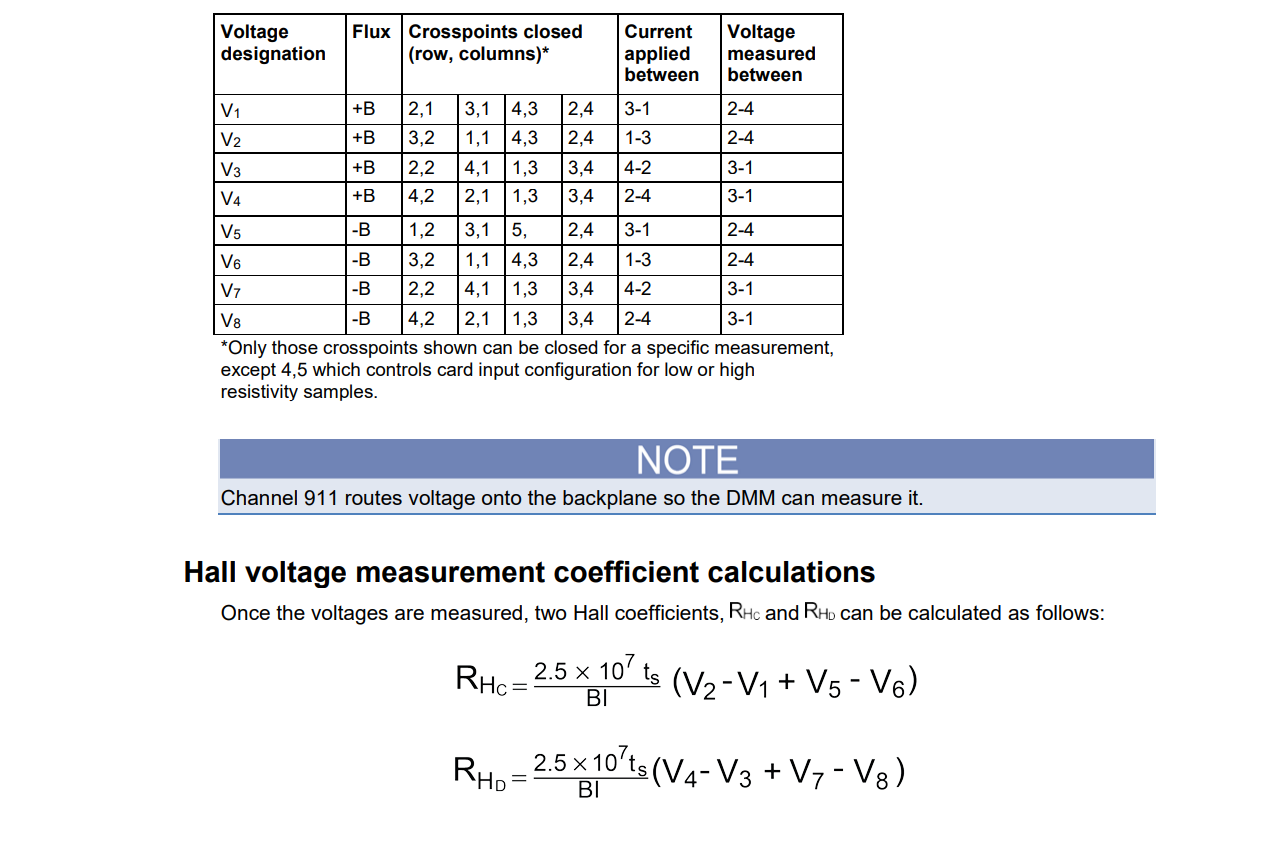

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
filename='C:\\Users\\Admin\\Desktop\\Data\\15june2023\\A304200KTESTING.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.423486,200.008554,-219.092852,218.963434,229.212214,-229.187394,9.181000e-07,1000000
1,0.001,8000.503003,200.003468,-220.039342,219.992888,228.177748,-228.150176,8.692000e-07,1000000
2,0.001,6000.370142,200.000883,-221.033071,221.022930,227.162444,-227.121078,8.524000e-07,1000000
3,0.001,4000.208765,200.000747,-222.089964,222.037889,226.144028,-226.124288,8.326000e-07,1000000
4,0.001,2000.212061,200.000104,-223.131768,223.100539,225.163826,-225.109600,8.310000e-07,1000000
5,0.001,0.256344,199.999770,-224.151868,224.121759,224.107680,-224.090394,8.108000e-07,1000000
6,0.001,-2000.491327,200.000275,-225.168248,225.168951,223.123329,-223.078674,8.078000e-07,1000000
7,0.001,-4000.149048,199.999908,-226.192101,226.174600,222.090045,-222.068989,7.912000e-07,1000000
8,0.001,-6000.320435,200.000423,-227.206973,227.227442,221.062740,-221.031053,7.848000e-07,1000000
9,0.001,-8000.197656,200.000935,-228.246058,228.209910,220.068055,-220.006383,7.768000e-07,1000000


In [113]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [114]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [115]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.423486,10000,200.008554,219.092852,-218.963434,-229.212214,229.187394,9.181000e-07,1000000
1,0.001,8000.503003,8000,200.003468,220.039342,-219.992888,-228.177748,228.150176,8.692000e-07,1000000
2,0.001,6000.370142,6000,200.000883,221.033071,-221.022930,-227.162444,227.121078,8.524000e-07,1000000
3,0.001,4000.208765,4000,200.000747,222.089964,-222.037889,-226.144028,226.124288,8.326000e-07,1000000
4,0.001,2000.212061,2000,200.000104,223.131768,-223.100539,-225.163826,225.109600,8.310000e-07,1000000


In [116]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

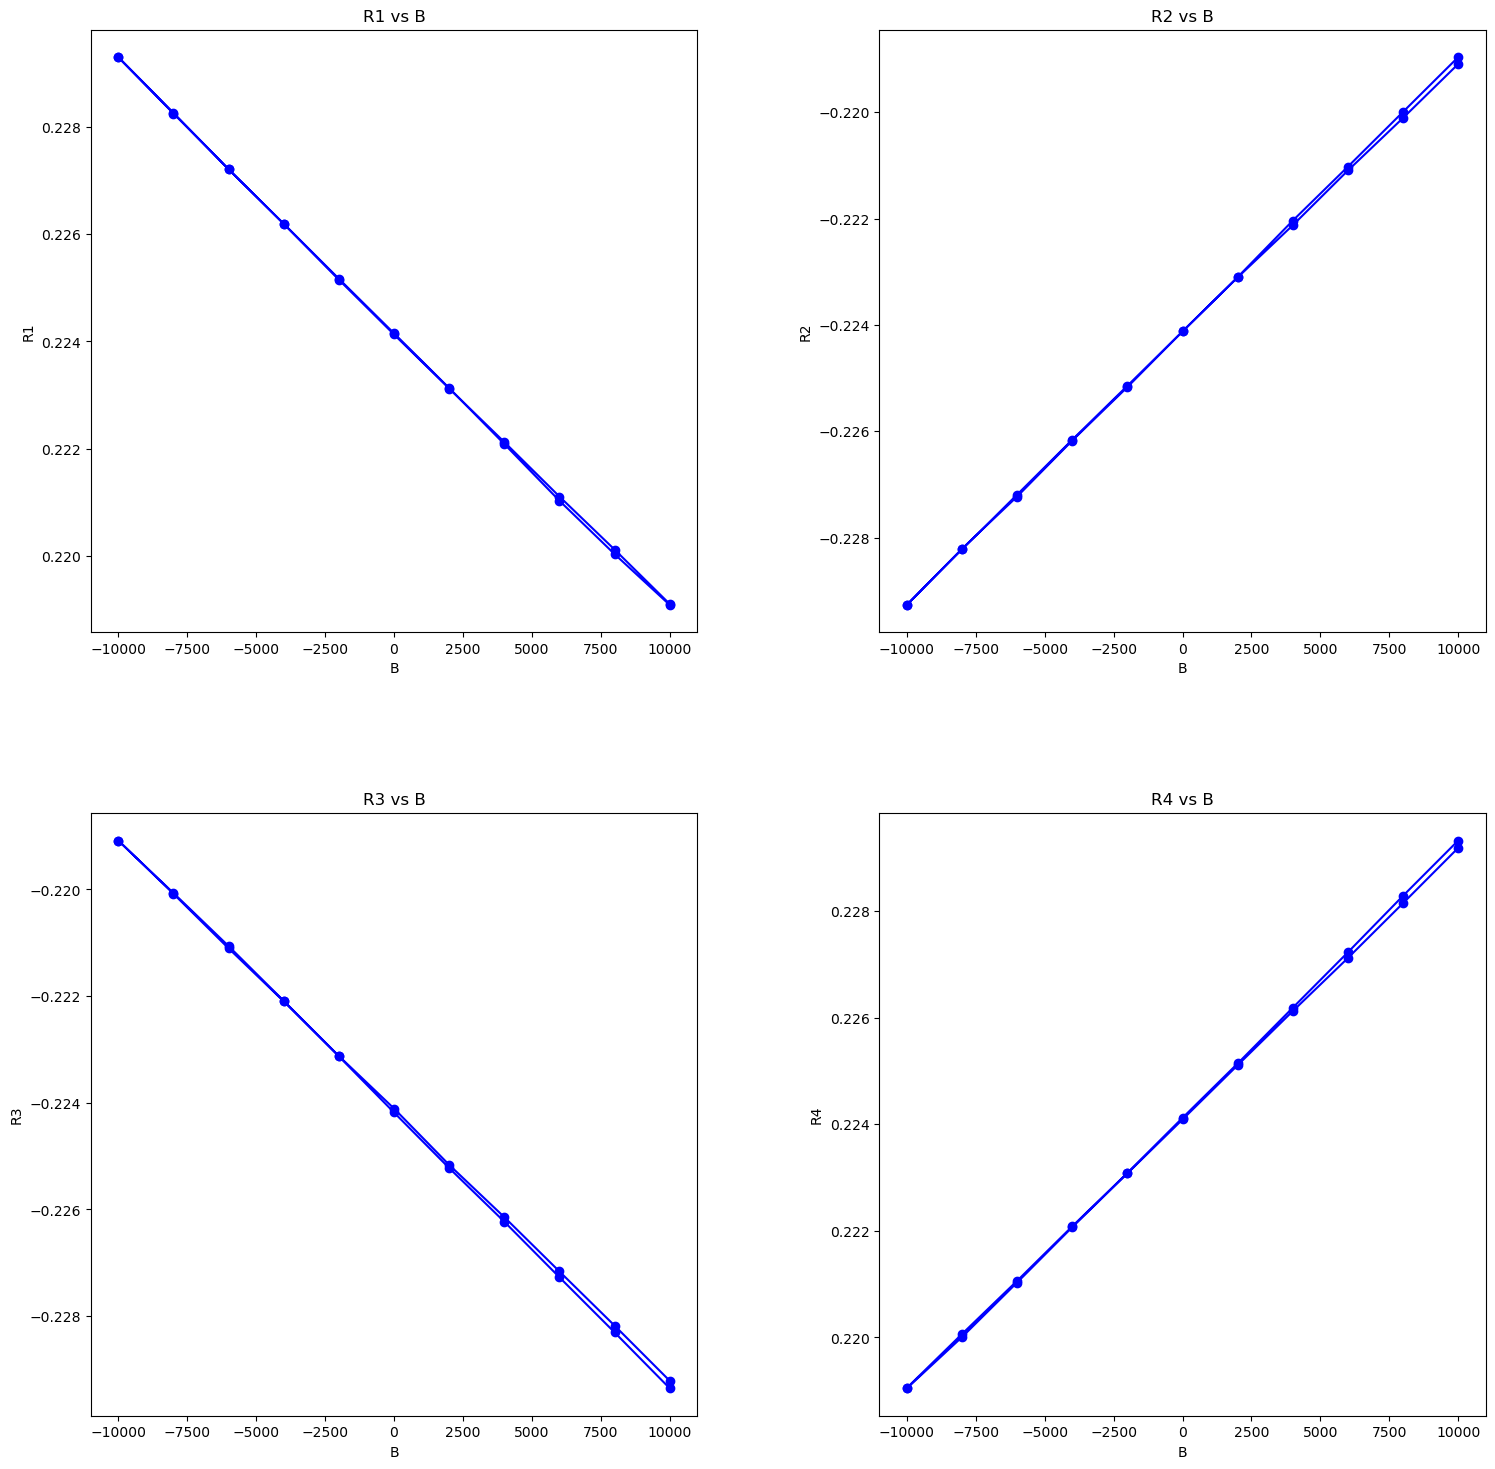

In [117]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [118]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [119]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

10

In [120]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [121]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.423486,10000,200.008554,219.092852,-218.963434,-229.212214,229.187394,9.181000e-07,1000000
1,0.001,8000.503003,8000,200.003468,220.039342,-219.992888,-228.177748,228.150176,8.692000e-07,1000000
2,0.001,6000.370142,6000,200.000883,221.033071,-221.022930,-227.162444,227.121078,8.524000e-07,1000000
3,0.001,4000.208765,4000,200.000747,222.089964,-222.037889,-226.144028,226.124288,8.326000e-07,1000000
4,0.001,2000.212061,2000,200.000104,223.131768,-223.100539,-225.163826,225.109600,8.310000e-07,1000000


In [122]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
11,0.001,-10000.359424,-10000,200.000832,229.296747,-229.261149,-219.082854,219.052471,7.767000e-07,1000000
12,0.001,-8000.417236,-8000,200.000166,228.257640,-228.221731,-220.082271,220.063708,7.774000e-07,1000000
13,0.001,-6000.335962,-6000,200.000276,227.208425,-227.190920,-221.105654,221.062488,7.777000e-07,1000000
14,0.001,-4000.358899,-4000,200.000895,226.190190,-226.159500,-222.098560,222.084732,7.755000e-07,1000000
15,0.001,-2000.274078,-2000,199.999806,225.149869,-225.144379,-223.129714,223.086895,7.680000e-07,1000000


In [123]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [124]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,200.008554,219.092852,-218.963434,-229.212214,229.187394,229.296747,-229.261149,-219.082854,219.052471,1000000
1,0.001,8000,200.003468,220.039342,-219.992888,-228.177748,228.150176,228.257640,-228.221731,-220.082271,220.063708,1000000
2,0.001,6000,200.000883,221.033071,-221.022930,-227.162444,227.121078,227.208425,-227.190920,-221.105654,221.062488,1000000
3,0.001,4000,200.000747,222.089964,-222.037889,-226.144028,226.124288,226.190190,-226.159500,-222.098560,222.084732,1000000
4,0.001,2000,200.000104,223.131768,-223.100539,-225.163826,225.109600,225.149869,-225.144379,-223.129714,223.086895,1000000


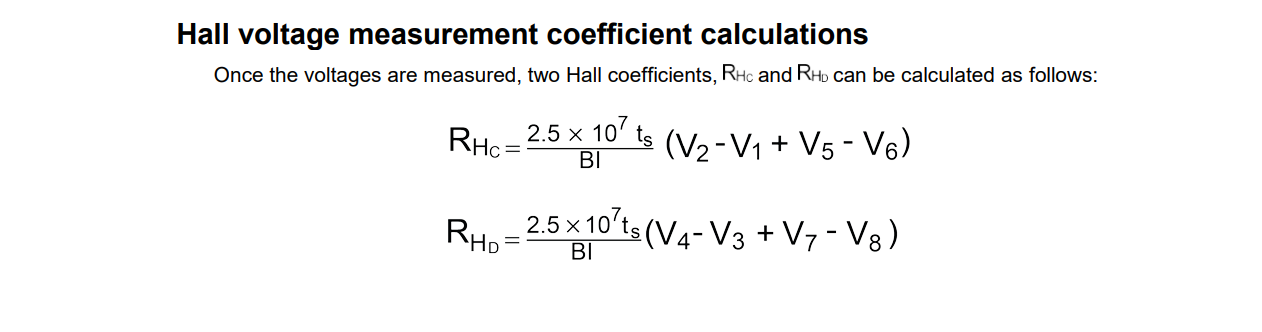
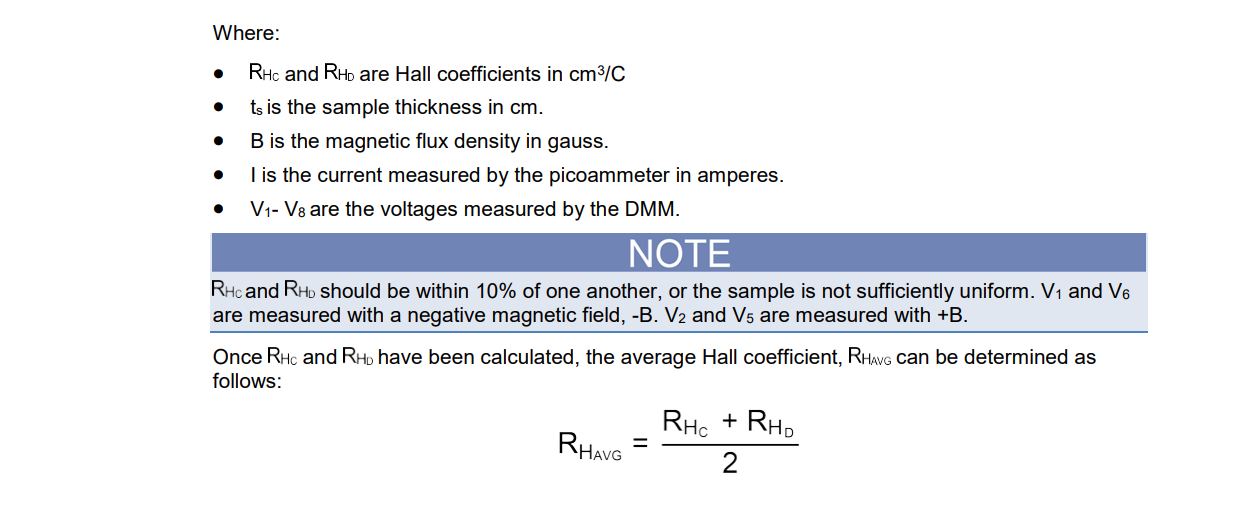

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [125]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

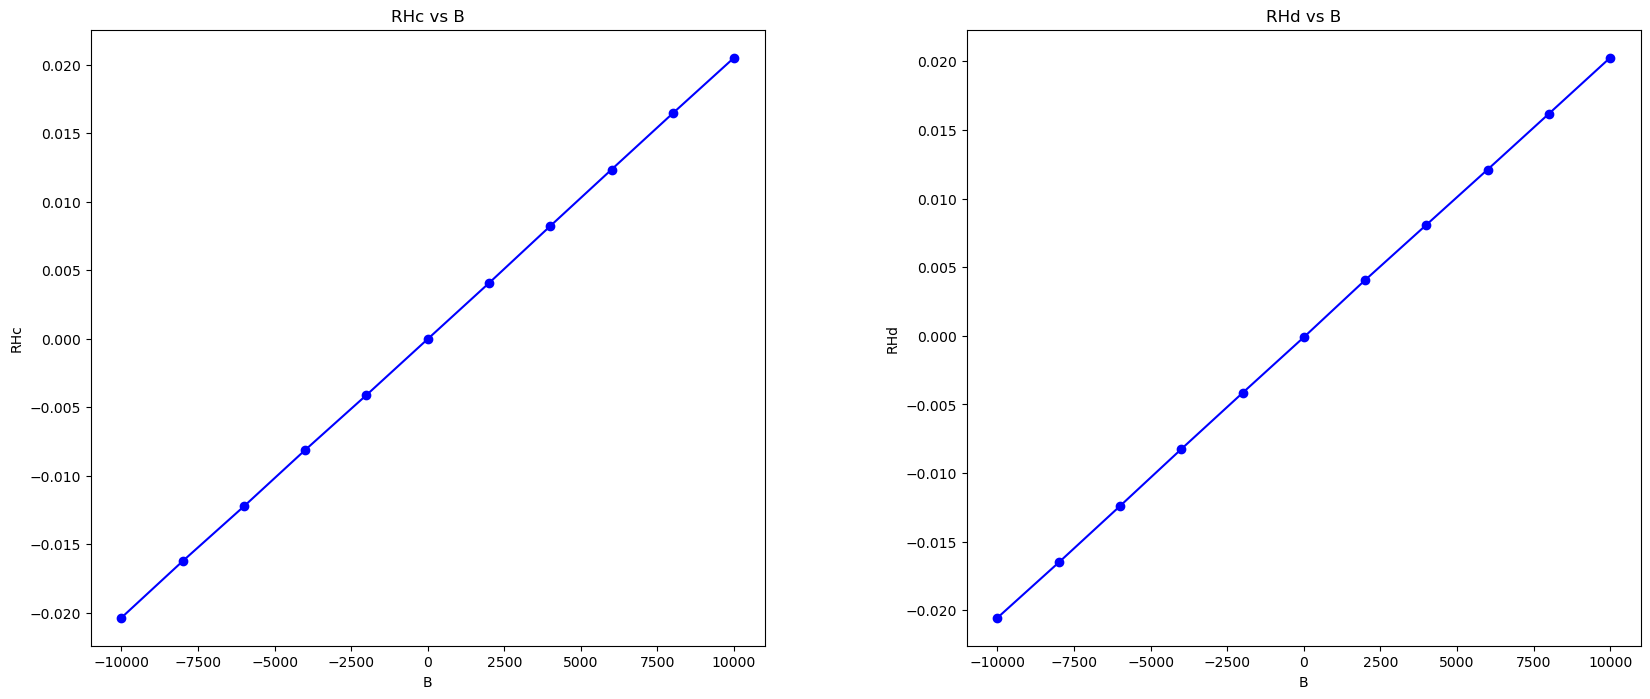

In [126]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

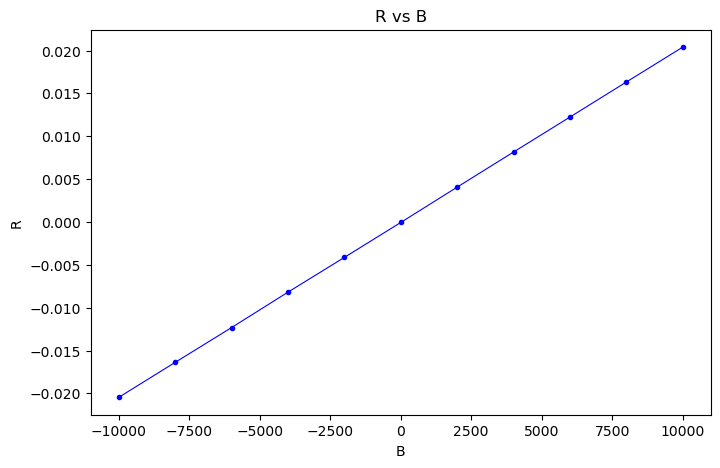

In [127]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [128]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,200.000832,229.296747,-229.261149,-219.082854,219.052471,219.092852,-218.963434,-229.212214,229.187394,1000000
1,0.001,-8000,200.000166,228.257640,-228.221731,-220.082271,220.063708,220.039342,-219.992888,-228.177748,228.150176,1000000
2,0.001,-6000,200.000276,227.208425,-227.190920,-221.105654,221.062488,221.033071,-221.022930,-227.162444,227.121078,1000000
3,0.001,-4000,200.000895,226.190190,-226.159500,-222.098560,222.084732,222.089964,-222.037889,-226.144028,226.124288,1000000
4,0.001,-2000,199.999806,225.149869,-225.144379,-223.129714,223.086895,223.131768,-223.100539,-225.163826,225.109600,1000000


### Hall resistance calculation

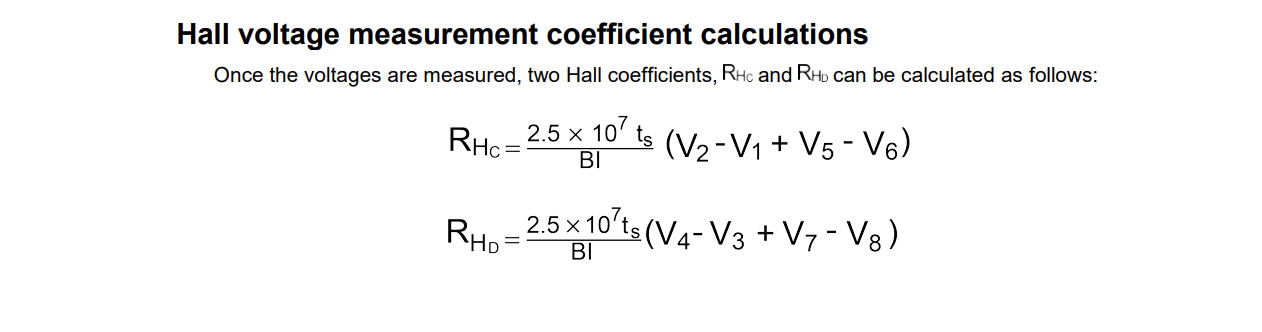

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [129]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

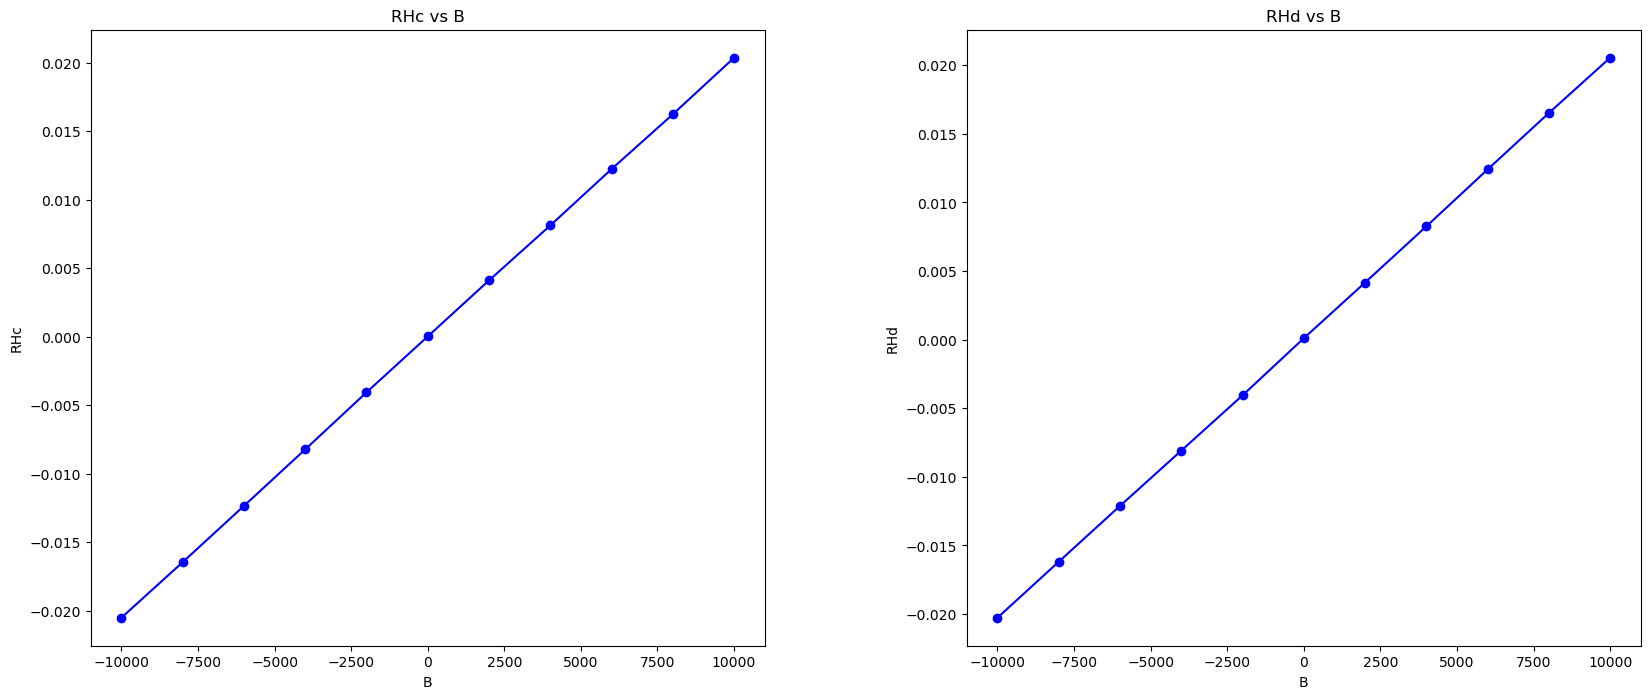

In [130]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

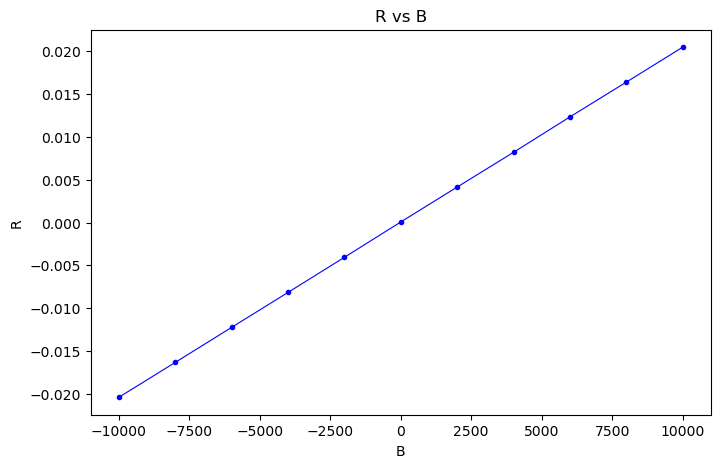

In [131]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

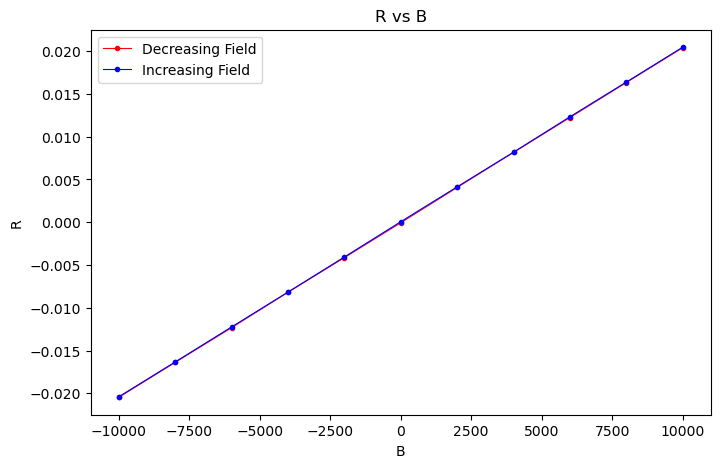

In [132]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()